<a href="https://colab.research.google.com/github/DainilSavani/Machine-Learning/blob/main/miniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Email spam detection**

Method 1: Logistic regression

In [ ]:
import pandas as pd
import numpy as np
import math
import random
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

data = pd.read_csv("emails.csv")
print(data)

       Email No.  the  to  ect  and  ...  military  allowing  ff  dry  Prediction
0        Email 1    0   0    1    0  ...         0         0   0    0           0
1        Email 2    8  13   24    6  ...         0         0   1    0           0
2        Email 3    0   0    1    0  ...         0         0   0    0           0
3        Email 4    0   5   22    0  ...         0         0   0    0           0
4        Email 5    7   6   17    1  ...         0         0   1    0           0
...          ...  ...  ..  ...  ...  ...       ...       ...  ..  ...         ...
5167  Email 5168    2   2    2    3  ...         0         0   0    0           0
5168  Email 5169   35  27   11    2  ...         0         0   1    0           0
5169  Email 5170    0   0    1    1  ...         0         0   0    0           1
5170  Email 5171    2   7    1    0  ...         0         0   1    0           1
5171  Email 5172   22  24    5    1  ...         0         0   0    0           0

[5172 rows x 30

In [ ]:
features = [f for f in data.columns if f != 'Prediction' and f != 'Email No.']
print(len(features))

3000


In [ ]:
def training(train_x, train_y, a, rho, epoch):
  w_arr = [random.random()/10 for i in range(len(train_x[0]))]
  ep = 0
  curr_loss = prev_loss = float('inf') 
  while ep<epoch:
    ep += 1
    curr_loss = 0
    for i in range(len(train_x)):  
      w = w_arr[2999]
      for p in range(len(w_arr)-1):
        w = w + train_x[i][p]*w_arr[p]
      h = (1 + math.exp(w*(-1)))**(-1)
      if train_y[i]==0:
        curr_loss += math.log(1-h)
      else:
        curr_loss += math.log(h)
      w_arr[2999] -= a*(h-train_y[i])
      for o in range(len(w_arr)-1):
        w_arr[o] -= a*(h - train_y[i])*train_x[i][o]
    curr_loss = curr_loss/len(train)
    if abs(curr_loss - prev_loss)<rho:
      break
  print("No. of epoch: ",ep,"\t\tError: ",curr_loss)
  return w_arr

In [ ]:
def validation(valid_x, valid_y, w_arr):
  loss = 0
  for i in range(len(valid_x)):
    w = w_arr[2999]
    for p in range(len(w_arr)-1):
      w = w + valid_x[i][p]*w_arr[p]
    h = (1 + math.exp(w*(-1)))**(-1)
    if valid_y[i]==0:
      loss += math.log(1-h)
    else:
      loss += math.log(h)
  loss = loss/len(valid_x)
  return abs(loss)

In [ ]:
def testing(test_x, w_arr):
  result = [0 for i in range(len(test_x))]
  for i in range(len(test_x)):
    h = w_arr[2999]
    for j in range(len(w_arr)-1):
      h += test_x[i][j]*w_arr[j]
    y = (1 + math.exp(h*(-1)))**(-1)
    result[i] = y
  return result

In [ ]:
def prediction(result):
  for i in range(len(result)):
    if result[i] >= 0.5:
      result[i] = 1
    else:
      result[i] = 0
  return result

In [ ]:
def accuracy(actual, predicted):
  return 1 - (np.count_nonzero(np.subtract(actual, predicted))/len(actual))

In [ ]:
def precision(actual, predicted, label):
  true = total = 0
  for i in range(len(predicted)):
    if predicted[i] == label and actual[i] == label:
      true += 1
    if predicted[i] == label:
      total += 1;
  if total == 0:
    return 0
  else:
    return true/total

In [ ]:
def recall(actual, predicted, label):
  true = total = 0
  for i in range(len(predicted)):
    if predicted[i] == label and actual[i] == label:
      true += 1;
    if actual[i] == label:
      total += 1;
  if total == 0:
    return 0
  else:
    return true/total

In [ ]:
def printResult(actual, predicted):
  print("\nOverAll Accuracy: {:.2%}".format(accuracy(actual, predicted)))
  for i in range(2):
    print("Precision for class {}: {:.2%}".format(i, precision(actual, predicted, i)))
  print()
  for i in range(2):
    print("Recall for class {}: {:.2%}".format(i, recall(actual, predicted, i)))

In [ ]:
data = data.sample(frac=1)
train, val = train_test_split(data, test_size=0.5)
val, test = train_test_split(data, test_size=0.8)

train_x, train_y = normalize(np.array(train[features])), np.array(train['Prediction'])
val_x, val_y = normalize(np.array(val[features])), np.array(val['Prediction'])
test_x, test_y = normalize(np.array(test[features])), np.array(test['Prediction'])

No. of epoch:  10 		Error:  -0.33252634473827897
No. of epoch:  50 		Error:  -0.13663600368924067
No. of epoch:  50 		Error:  -0.37287911763438547


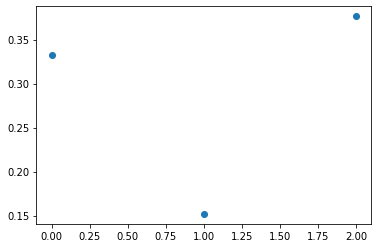

In [ ]:
alpha = [0.1, 0.5, 0.01]
rho = [0.01, 0.001, 0.0001]
epoch = [10, 50, 50]
mse = []

for i in range(3):
  w_arr = training(train_x, train_y, alpha[i], rho[i], epoch[i])
  mse.append(validation(val_x, val_y, w_arr))
plt.scatter(np.arange(3), mse)
plt.show()

In [ ]:
weight = training(train_x, train_y, alpha[1], rho[1], epoch[1])
result = testing(test_x, w_arr)
predicted = prediction(result)
printResult(test_y, predicted)

No. of epoch:  50 		Error:  -0.13663876614061043

OverAll Accuracy: 82.41%
Precision for class 0: 82.08%
Precision for class 1: 84.02%

Recall for class 0: 96.18%
Recall for class 1: 48.88%


Method 2: Single Layer Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=1).fit(test_x, test_y)
predicted = clf.predict(test_x)
printResult(test_y, predicted)


OverAll Accuracy: 97.27%
Precision for class 0: 97.13%
Precision for class 1: 97.64%

Recall for class 0: 99.08%
Recall for class 1: 92.86%


Method 3: Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(20),activation="relu",random_state=1).fit(train_x, train_y)
predicted = clf.predict(test_x)
printResult(test_y, predicted)